### Recurrent Neutal Network: 

In [1]:
# Importing the required libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Extracting the test datset: 
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [13]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


#### EDA: 

In [67]:
# Checking the shapce of the dataset: 
df_train.shape

(1258, 6)

In [68]:
# Checking for any nan: 
df_train.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

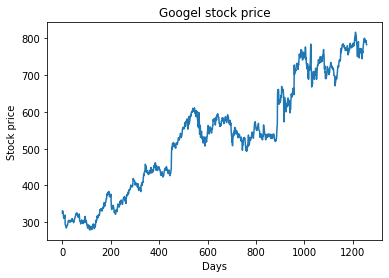

In [70]:
# Viewing the stock price change:
plt.plot(df_train.Open)
plt.xlabel('Days')
plt.ylabel('Stock price')
plt.title('Googel stock price')
plt.show()

In [14]:
training_dataset = df_train['Open'].values

In [15]:
training_dataset

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [16]:
df_train.shape

(1258, 6)

In [17]:
# Cheking the length of training dataset: 
len(training_dataset)

1258

In [18]:
# Reshaping the dataset before applying scaling: 
training_dataset = np.reshape(training_dataset, (-1,1))

In [19]:
training_dataset.shape

(1258, 1)

In [20]:
# Preprocessing the dataset: 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_dataset_scaled = scaler.fit_transform(training_dataset)

In [21]:
training_dataset_scaled.shape

(1258, 1)

In [22]:
# Developing x_train by choosing 60 as stepback size: 
x_train = list()
y_train = list()
for i in range(60, training_dataset_scaled.shape[0]):
    x_train.append(training_dataset_scaled[i-60:i,0])
    y_train.append(training_dataset_scaled[i,0])

In [23]:
# Converting x_tain and y_train to np array: 
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
# Verifying the shapes of x_train and y_train: 
x_train.shape

(1198, 60)

In [25]:
y_train.shape

(1198,)

In [26]:
# Reshaping the dataset into a 3D array to match RNN requirement: 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [28]:
# Verifying the shape of x_train: 
x_train.shape

(1198, 60, 1)

### Building the RNN model: 

In [29]:
# Importing the required libraries: 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [57]:
# Developing the model: 
# Initializing the model:
reg = Sequential()

# Adding the input and the 1st LSTM layer: 
reg.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
reg.add(Dropout(0.2))
# Adding the 2nd LSTM layer: 
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))
# Adding the 3rd LSTM layer: 
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))
# Adding the 4th LSTM layer: 
reg.add(LSTM(units = 50, return_sequences = False))
reg.add(Dropout(0.2))

# Adding the output layer: 
reg.add(Dense(units = 1))
# Backpropagation: 
reg.compile(loss = 'mean_squared_error', optimizer = 'adam')
# Fitting the model:
reg.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0363
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0059
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0050
Epoch 12/100
1198/1198 [==============================] - 11s 9m

1198/1198 [==============================] - 14s 11ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0017
Epoch 98/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0013


#### Developing the test dataset:

In [30]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [31]:
# Viewing the dataframe: 
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [32]:
df_test.shape

(20, 6)

In [33]:
test_dataset = df_test.Open

In [35]:
total_dataset = pd.concat((df_train, df_test), axis = 0)

In [36]:
total_dataset.shape

(1278, 6)

In [42]:
total_data = pd.DataFrame(total_dataset.Open)

In [43]:
total_data.shape

(1278, 1)

In [44]:
type(total_data)

pandas.core.frame.DataFrame

In [45]:
# Scaling the test dataset: 
total_data_scaled = scaler.transform(total_data)

In [46]:
total_data_scaled.shape

(1278, 1)

In [49]:
# Defining the start and end of the for loop: 
start = len(total_data_scaled) - len(test_dataset)

In [50]:
start

1258

In [51]:
end = len(total_data_scaled)

In [52]:
end

1278

In [53]:
x_test = list()
for i in range(start, end):
    x_test.append(total_data_scaled[i-60:i])

In [55]:
# Turning x_test into a np array: 
x_test = np.array(x_test)

In [56]:
x_test.shape

(20, 60, 1)

In [59]:
test_dataset  = test_dataset.values

In [60]:
test_dataset

array([778.81, 788.36, 786.08, 795.26, 806.4 , 807.86, 805.  , 807.14,
       807.48, 807.08, 805.81, 805.12, 806.91, 807.25, 822.3 , 829.62,
       837.81, 834.71, 814.66, 796.86])

#### Making the predictions: 

In [61]:
y_pred = reg.predict(x_test)

In [62]:
y_pred = scaler.inverse_transform(y_pred)

In [63]:
y_pred

array([[782.8078 ],
       [780.3833 ],
       [779.913  ],
       [780.73615],
       [783.51843],
       [788.8363 ],
       [794.5754 ],
       [798.1609 ],
       [799.6818 ],
       [799.8892 ],
       [799.46747],
       [798.7602 ],
       [798.07886],
       [798.0423 ],
       [798.6209 ],
       [802.22156],
       [808.4289 ],
       [815.9301 ],
       [821.38434],
       [820.14166]], dtype=float32)

#### Viewing the graph: 


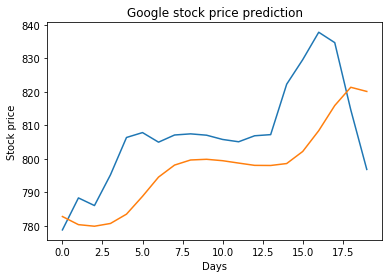

In [66]:
plt.plot(test_dataset, label = 'True')
plt.plot(y_pred, label = 'Pred')
plt.xlabel('Days')
plt.ylabel('Stock price')
plt.title('Google stock price prediction')
plt.show()